<img src='README_files/PersiST_Logo.png' width='300' > 

# PersiST

PersiST is an exploratory method for analysing spatial transcriptomics (and other 'omics) datsets. Given a spatial transcriptomics data set containing expression data on multiple genes resolved to a shared set of co-orindates, PerisST computes a single score for each gene that measures the amount of spatial structure that gene shows in it's expression pattern, called the *Coefficient of Spatial Structure* (CoSS). This score can be used for multiple analytical tasks, as we show below.

# Spatially Variable Gene Identification

For this tutorial, we shall be looking at spatial transcriptomics data on a sample from the Kidney Precision Medicine Project[1]. 

In [1]:
import pandas as pd
df = pd.read_csv('data/kpmp_30-10125_spatial_expression.csv')
df.head()

,x_position,y_position,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,...,ENSG00000288156,ENSG00000288162,ENSG00000288172,ENSG00000288187,ENSG00000288234,ENSG00000288253,ENSG00000288302,ENSG00000288380,ENSG00000288398,SOD2
0,0.548810,0.834208,0.00000,0.0,0.000000,0.0,0.00000,117.633220,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1058.6990
1,0.589610,0.809106,0.00000,0.0,0.000000,0.0,0.00000,86.865880,173.73177,86.86588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1737.3176
2,0.571644,0.166174,75.90709,0.0,75.907090,0.0,0.00000,0.000000,151.81418,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2201.3057
3,0.539074,0.714422,382.89725,0.0,127.632416,0.0,0.00000,127.632416,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1148.6918
4,0.570493,0.468741,82.88438,0.0,0.000000,0.0,82.88438,0.000000,82.88438,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1989.2250


This is a pandas DataFrame where the first two columns correspond to the well co-ordinates, and the remaining columns contain the expression of each gene. This is the format PersiST expects spatial transcriptomics data to come in.

Let's compute CoSS scores for all the genes in this sample.

In [ ]:
from compute_persistence import run_persistence
metrics, diagrams = run_persistence(df)

Let's take a look at those genes with the highest CoSS scores

In [10]:
metrics = metrics.sort_values('CoSS', ascending=False)
metrics.iloc[:10,:]

,gene,CoSS,ratio,rank,possible_artefact,svg
16443,IGLC1,0.141047,0.615050,1.0,No,Yes
16483,IGHG1,0.111424,0.438202,2.0,No,Yes
10798,DEFB1,0.104846,0.370431,3.0,No,Yes
12467,CCL19,0.103292,0.588332,4.0,No,Yes
5372,MT1G,0.103063,0.386810,5.0,No,Yes
11812,UMOD,0.099496,0.327315,6.0,No,Yes
5750,PODXL,0.095723,0.367521,7.0,No,Yes
3288,PTGDS,0.094730,0.406293,8.0,No,Yes
1102,SLC12A3,0.094595,0.329399,9.0,No,Yes
6980,ALDOB,0.093952,0.275843,10.0,No,Yes


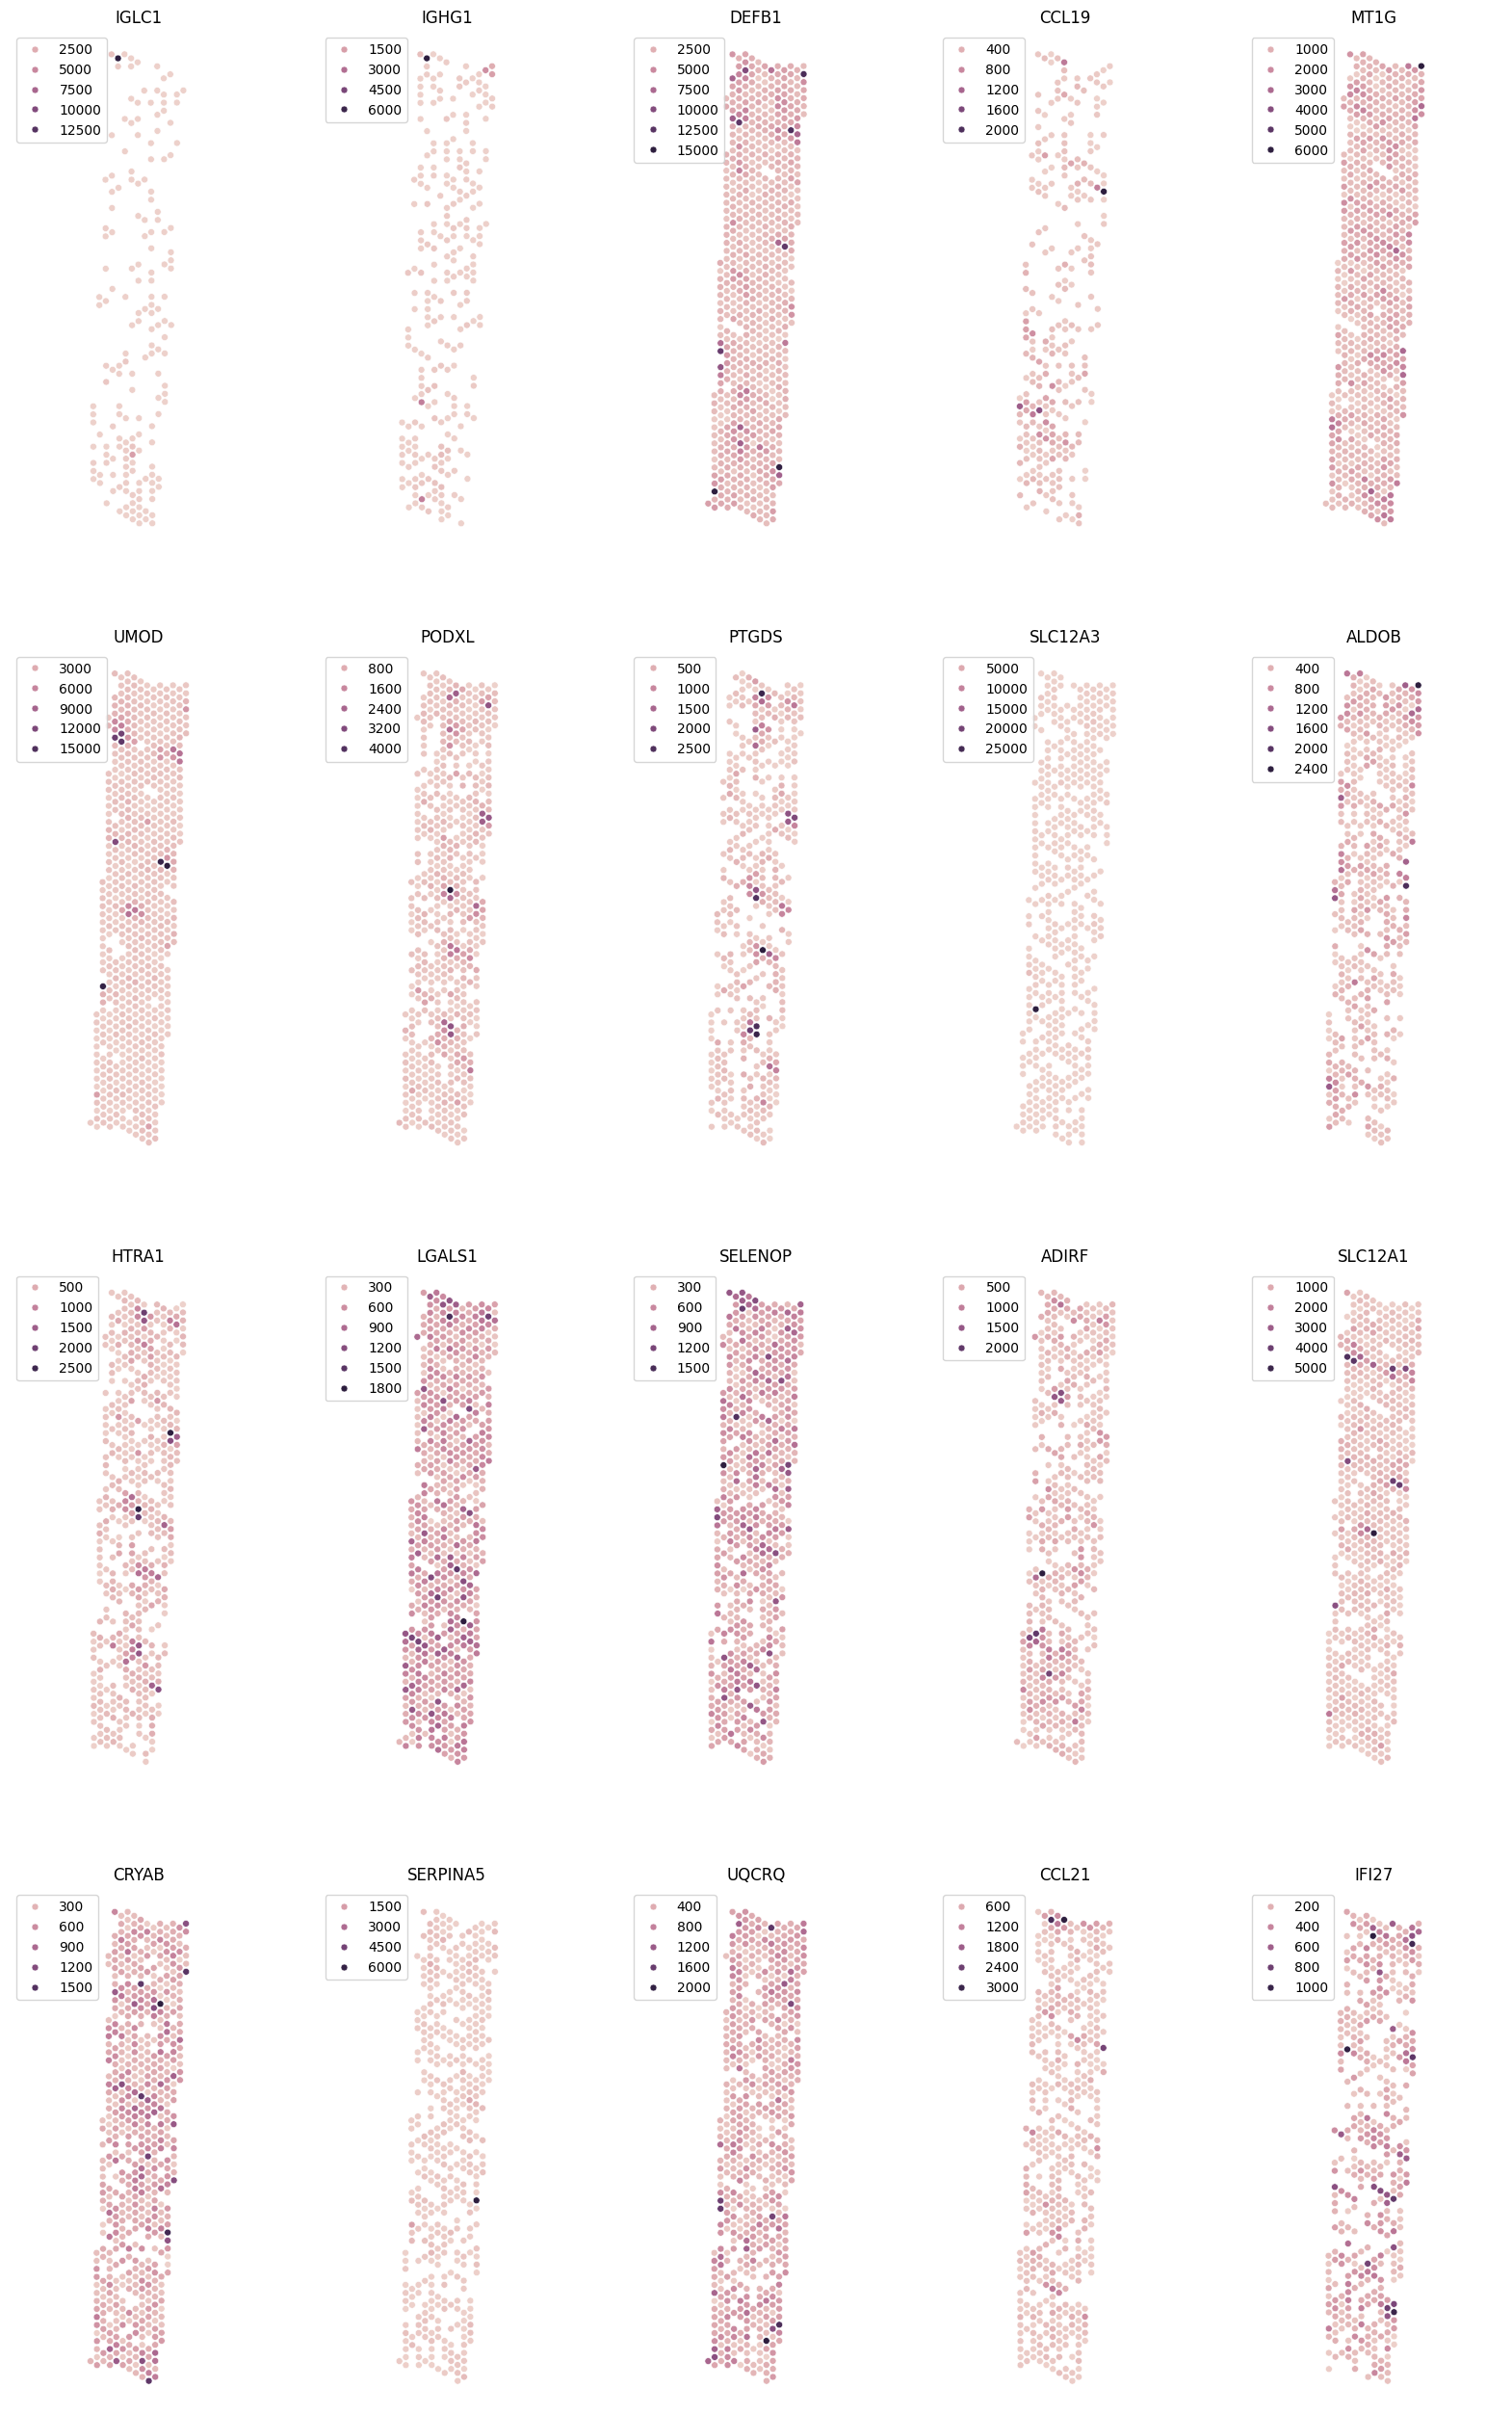

In [11]:
from plotting_utils import plot_many_genes
plot_many_genes(df, list(metrics.gene)[:20])

We can see that PersiST effectively surfaces those genes with notable spatial structure.

From the CoSS scores PersiST automatically calles genes as SV or not (this is the 'svg' column in the results). Once the data set has been reduced to the comparatively small number of genes PersiST typically calls as SV, in our experience simple clustering methods, such as hierarchical clustering, were effective to pick out groups of co-expressed SVGs.

Here is such a group of genes all expressed in the glomeruli of this particular sample [2].

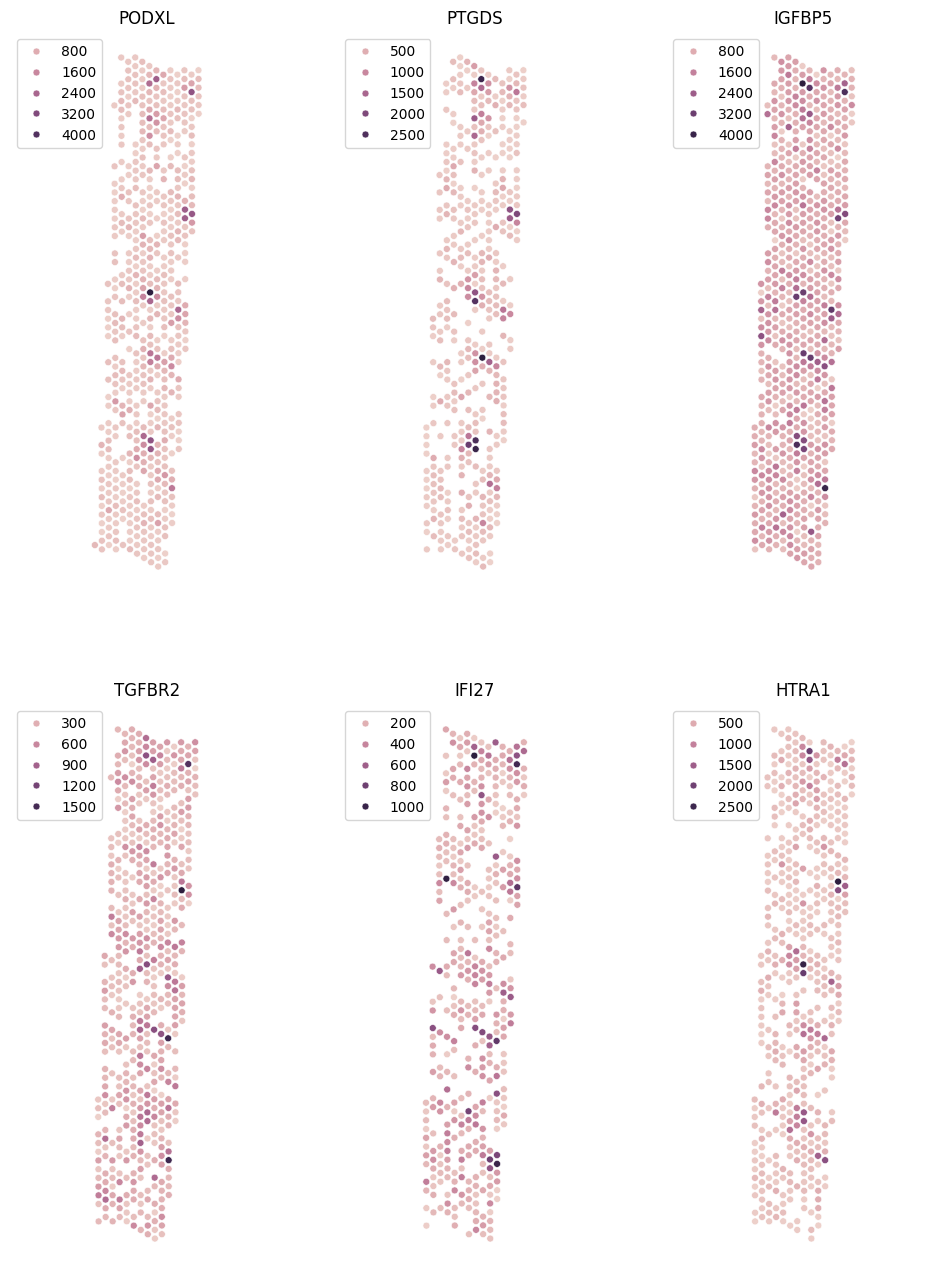

In [10]:
plot_many_genes(df, ['PODXL', 'PTGDS', 'IGFBP5', 'TGFBR2', 'IFI27', 'HTRA1'], numcols=3)